<a href="https://colab.research.google.com/github/21002268uhi/21002268_DataAnalytics/blob/main/normLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attempts a normalisation layer



In [1]:
#@title Imports modules
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, metrics, optimizers
import numpy as np
from matplotlib import pyplot as plt


# adjust granularity of reporting
pd.options.display.max_rows = 100
pd.options.display.float_format = "{:.1f}".format

In [2]:
#@title Gets the data ready
df = pd.read_csv('https://raw.githubusercontent.com/21002268uhi/21002268_DataAnalytics/main/ohc_no_outliers.csv', index_col = 0, )
shuffled_df = df.reindex(np.random.permutation(df.index))

mask = np.random.rand(len(shuffled_df)) <= 0.8
train_df = shuffled_df[mask]
test_df = shuffled_df[~mask]


## Makes the layers

In [3]:
#@title Creates the feature layer
# Creates an empty list that will eventually hold all created feature columns.
feature_columns = []

# Function to create the feature layer 
def make_feature_layer(*column):
  for index in range(len(column)):
    value = tf.feature_column.numeric_column("%s" % (column[index]))
    feature_columns.append(value)

  # Converts the list of feature columns into a layer  
  created_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
  return (created_feature_layer)

# Calls the function to make feature layer
my_feature_layer = make_feature_layer("temp", "wdsp", "visib", "prcp", "fog",
                                      "isMon", "isTue", "isWed", "isThur", "isFri","isSat", "isSun",
                                      "year_2012", "year_2013", "year_2014", "year_2015", "year_2016",
                                      "year_2018","year_2019", "year_2020","year_2021","year_2022",
                                      "month_1","month_2","month_3","month_4","month_5", "month_6",
                                      "month_7", "month_8", "month_9", "month_10", "month_11","month_12"
)

In [4]:
#@title Creates the normalisation layer

# calculate mean and sd
collision_mean = train_df["num_collisions"].mean()
collision_var = np.var(train_df["num_collisions"])

# makes empty list
normal_columns = []

# Function to create the normalising layer 
def make_normalisation_layer(mean, var, *column):
  for index in range(len(column)):
    value = tf.feature_column.numeric_column("%s" % (column[index]))
    normal_columns.append(value)

  # Converts the list of feature columns into a layer  
  created_normal_layer = tf.keras.layers.Normalization(axis = None,
                                                       mean = mean,
                                                       variance = var)
  return (created_normal_layer)

# Calls the function to make normalisation layer
my_normalisation_layer = make_normalisation_layer(collision_mean, collision_var,
                                                  "temp", "wdsp", "visib", "prcp", "fog",
                                      "isMon", "isTue", "isWed", "isThur", "isFri","isSat", "isSun",
                                      "year_2012", "year_2013", "year_2014", "year_2015", "year_2016",
                                      "year_2018","year_2019", "year_2020","year_2021","year_2022",
                                      "month_1","month_2","month_3","month_4","month_5", "month_6",
                                      "month_7", "month_8", "month_9", "month_10", "month_11","month_12")

In [5]:
#@title Defines the plotting function.

def plot_the_loss_curve(epochs, mse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  


## Defines a deep neural net model

In [6]:
def create_model(my_learning_rate, my_feature_layer, my_normalisation_layer):
  model = models.Sequential()

  # Adds the layer containing the feature columns to the model
  model.add(my_feature_layer)
  
  # Adds the normalisation layer to the model
  model.add(my_normalisation_layer)

  # Defines the first hidden layer with 20 nodes  
  model.add(layers.Dense( units = 20, 
                          activation = 'relu', 
                          name = 'Hidden1'))
  
  # Defines the second hidden layer with 12 nodes
  model.add(layers.Dense( units = 12, 
                          activation = 'relu', 
                          name = 'Hidden2'))
  
  # Defines the output layer
  model.add(layers.Dense( units = 1,  
                          name = 'Output'))                              
  
  # Compiles the model
  model.compile(optimizer = optimizers.Adam(learning_rate = my_learning_rate),
                loss = "mean_squared_error",
                metrics = [metrics.MeanSquaredError()])
  

  return model

## Defines a training function

In [7]:
def train_model(model, dataset, epochs, label_name,
                batch_size = None):

  # Splits the dataset into features and label
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x = features, y = label, batch_size = batch_size,
                      epochs = epochs, shuffle = True
                      ) 

  # Stores the list of epochs separately from the rest of history
  epochs = history.epoch
  
  # Tracks the progression of training by getting MSE at each epoch. 
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse

## Calls the functions to build and train the DNN



Epoch 1/50


12/12 [==============================] - 5s 34ms/step - loss: 284342.5938 - mean_squared_error: 284342.5938
Epoch 2/50
12/12 [==============================] - 0s 31ms/step - loss: 278155.5625 - mean_squared_error: 278155.5625
Epoch 3/50
12/12 [==============================] - 0s 37ms/step - loss: 271297.9375 - mean_squared_error: 271297.9375
Epoch 4/50
12/12 [==============================] - 0s 23ms/step - loss: 263052.9062 - mean_squared_error: 263052.9062
Epoch 5/50
12/12 [==============================] - 0s 18ms/step - loss: 252805.8281 - mean_squared_error: 252805.8281
Epoch 6/50
12/12 [==============================] - 0s 34ms/step - loss: 240540.3594 - mean_squared_error: 240540.3594
Epoch 7/50
12/12 [==============================] - 0s 36ms/step - loss: 226265.5781 - mean_squared_error: 226265.5781
Epoch 8/50
12/12 [==============================] - 0s 23ms/step - loss: 210078.0156 - mean_squared_error: 210078.0156
Epoch 9/50
12/12 [==============================] - 0s 21ms

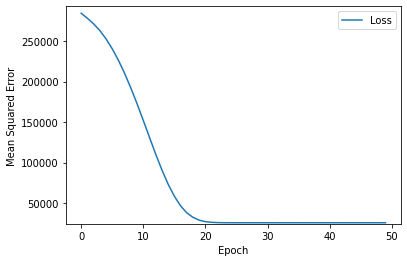


 Evaluate the new model against the test set:


3/3 [==============================] - 1s 6ms/step - loss: 27268.4531 - mean_squared_error: 27268.4531


[27268.453125, 27268.453125]

In [8]:
# Sets the hyperparameters
learning_rate = 0.001
epochs = 50
batch_size = 200

# Selects the label
label_name = "num_collisions"

# Sets the model's topography
my_model = create_model(learning_rate, my_feature_layer, my_normalisation_layer)

# Trains the model on the normalized training set
epochs, mse = train_model(my_model, train_df, epochs, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

# tests the model against the test set
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name)) 
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size = batch_size)

In [9]:
#@title Latest Data Predictions

latest_data = pd.read_csv ("https://raw.githubusercontent.com/21002268uhi/21002268_DataAnalytics/main/oh_latest%20(3).csv", index_col = 0)

In [10]:
latest_features = {name:np.array(value) for name, value in latest_data.items()}
latest_label = np.array(latest_features.pop("num_collisions"))

In [11]:
prediction = my_model.predict(latest_features)

1/1 [==============================] - 0s 470ms/step


In [12]:
# table of results
actual = np.array(latest_data["num_collisions"])
print("Predicted      Actual     Difference")
print("------------------------------------")
for i in range(len(prediction)):
  print (prediction[i],"   ", actual[i],"     ", prediction[i]-actual[i])

Predicted      Actual     Difference
------------------------------------
[516.20575]     153       [363.20575]
[515.6809]     188       [327.6809]
[515.76154]     268       [247.76154]
[516.0983]     278       [238.09833]
[515.76166]     197       [318.76166]
[515.90875]     257       [258.90875]
[515.81476]     195       [320.81476]


The model trained but the results indicate an error in the methodology.

Batch normalisation was also attempted but produced equally bad results.

[Back to main document](https://colab.research.google.com/drive/1tR-0vi4vbjV7kkigRkSY0DAIdVnQerUq?usp=sharing)